In [148]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [149]:
data = fetch_california_housing(as_frame=True)
df = data.frame
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [150]:
# Inspects the dataset shape
print(f"Dataset shape: {df.shape}")

# Prints column names and data types
print("Columns and data types:")
print(df.dtypes)

# Summary statistics of the dataset
print("Summary statistics:")
print(df.describe())

Dataset shape: (20640, 9)
Columns and data types:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object
Summary statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000  

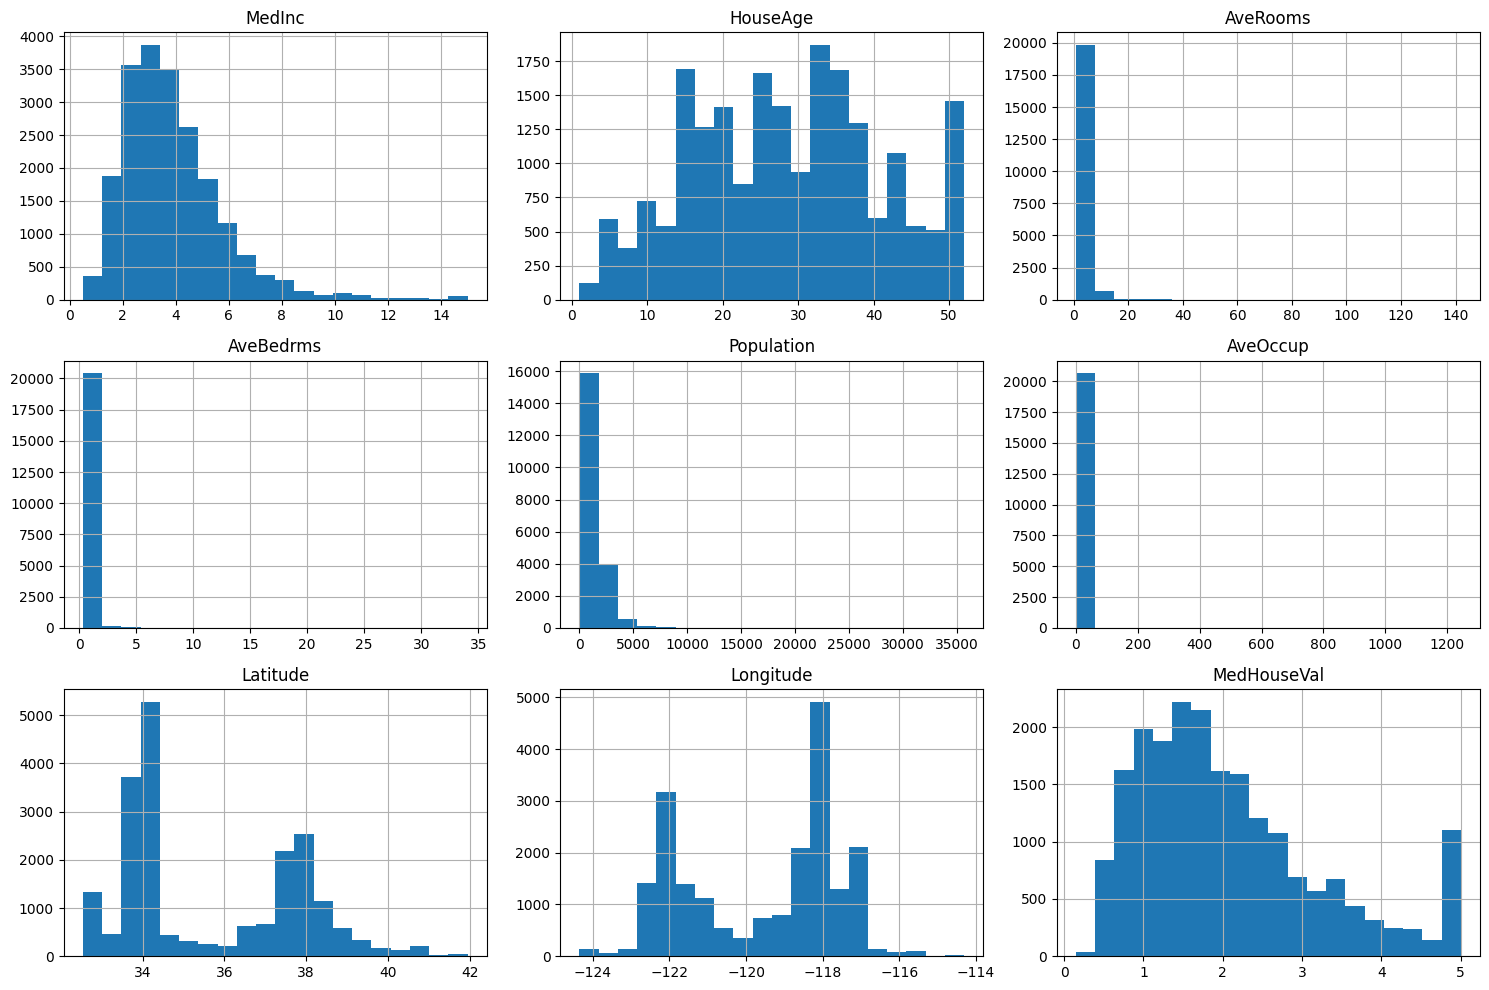

In [151]:
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [152]:
# Remove 10% of 'AveRooms' and 'AveOccup' values
missing_indices = np.random.choice(df.index, size=int(len(df) * 0.1), replace=False)
df.loc[missing_indices, 'AveRooms'] = np.nan
df.loc[missing_indices, 'AveOccup'] = np.nan

print("Missing data count:")
print(df.isnull().sum())

Missing data count:
MedInc            0
HouseAge          0
AveRooms       2064
AveBedrms         0
Population        0
AveOccup       2064
Latitude          0
Longitude         0
MedHouseVal       0
dtype: int64


In [153]:
# Replace missing values with mean
df['AveRooms'] = df['AveRooms'].fillna(df['AveRooms'].mean())
df['AveOccup'] = df['AveOccup'].fillna(df['AveOccup'].mean())

print("Missing data after imputation:")
print(df.isnull().sum())

Missing data after imputation:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [156]:
# Set X as Features and y as target variable
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled_df.head())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.734002  -0.153758   -0.974429 -0.051121  1.052548   
1  2.332238 -0.607019  0.385361  -0.263336    0.861439 -0.094115  1.043185   
2  1.782699  1.856182  1.343433  -0.049016   -0.820777 -0.027323  1.038503   
3  0.932968  1.856182  0.188706  -0.049833   -0.766028 -0.051855  1.038503   
4 -0.012881  1.856182  0.405792  -0.032906   -0.759847 -0.087206  1.038503   

   Longitude  
0  -1.327835  
1  -1.322844  
2  -1.332827  
3  -1.337818  
4  -1.337818  


In [157]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2)

# Train Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train Lasso Regression using GridSearchCV
lasso = GridSearchCV(Lasso(), {'alpha': [0.01, 0.1, 1, 10]}, cv=5)
lasso.fit(X_train, y_train)

# Train Ridge Regression using GridSearchCV
ridge = GridSearchCV(Ridge(), {'alpha': [0.01, 0.1, 1, 10]}, cv=5)
ridge.fit(X_train, y_train)

print(f"Best Lasso alpha: {lasso.best_params_}")
print(f"Best Ridge alpha: {ridge.best_params_}")

Best Lasso alpha: {'alpha': 0.01}
Best Ridge alpha: {'alpha': 10}


In [158]:
models = {'Linear Regression': linear_model, 'Lasso': lasso.best_estimator_, 'Ridge': ridge.best_estimator_}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name} Evaluation:")
    print(f"  MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"  MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"  R-squared: {r2_score(y_test, y_pred):.4f}\n")

Linear Regression Evaluation:
  MSE: 0.5382
  MAE: 0.5420
  R-squared: 0.5894

Lasso Evaluation:
  MSE: 0.5451
  MAE: 0.5448
  R-squared: 0.5841

Ridge Evaluation:
  MSE: 0.5383
  MAE: 0.5420
  R-squared: 0.5893



In [159]:
# Reformat the target variable
median_value = y.median()
y_binary = (y > median_value).astype(int)

# Resplit data with y_binary
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_binary, test_size=0.2)

# Train logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


# Predict on test data and calculate metrics
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Logistic Regression Evaluation:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}")
print(f"  ROC-AUC: {roc_auc:.4f}")


Logistic Regression Evaluation:
  Accuracy: 0.8442
  Precision: 0.8439
  Recall: 0.8451
  F1-Score: 0.8445
  ROC-AUC: 0.9216


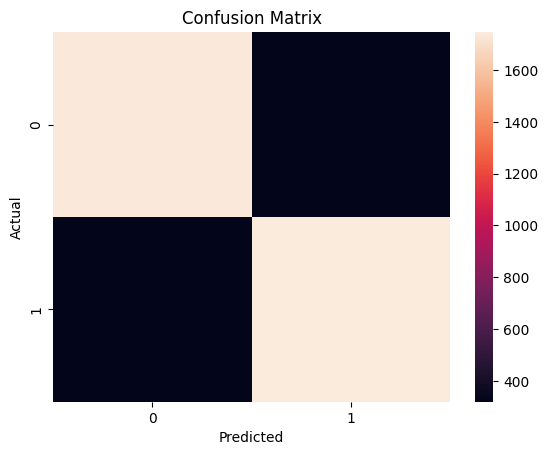

In [160]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Set figure and labels
plt.figure()
sns.heatmap(conf_matrix)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

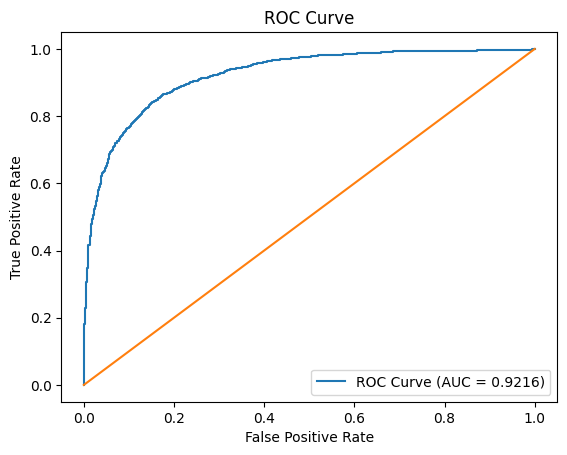

In [161]:
# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1])  # Baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


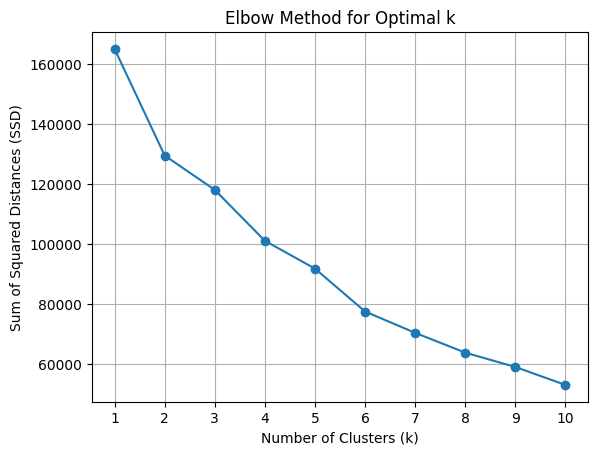

In [166]:
# Compute SSD for k values from 1 to 10
ssd = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled_df)
    ssd.append(kmeans.inertia_)

# Plot the SSD against k
plt.figure()
plt.plot(k_range, ssd, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid()
plt.show()

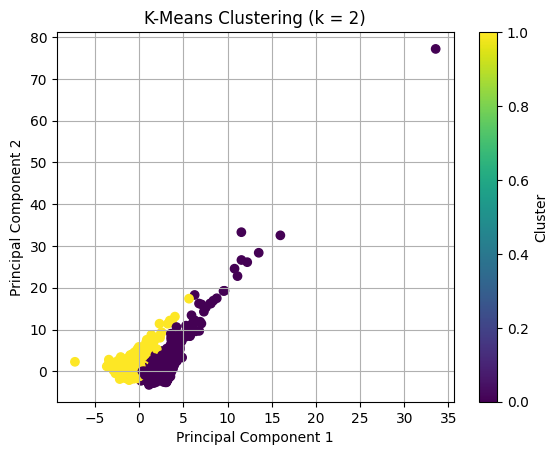

In [168]:
# The Elbow Point in the plot above would be 2
# Reason: K=2 is where the rate of decrease in SSD slows most significantly
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

elbow_point = 2
kmeans = KMeans(n_clusters=elbow_point)
clusters = kmeans.fit_predict(X_scaled_df)

# Scatter plot of clusters
plt.figure()
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.title(f'K-Means Clustering (k = {elbow_point})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid()
plt.show()


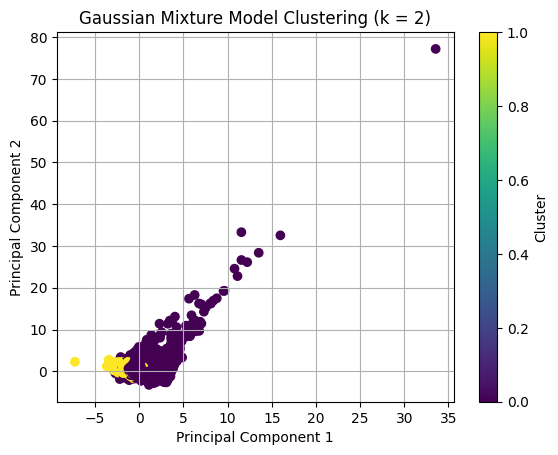

In [178]:
gmm = GaussianMixture(n_components=2)
gmm_clusters = gmm.fit_predict(X_scaled_df)

# Visualize GMM clusters using PCA
plt.figure()
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_clusters)
plt.title('Gaussian Mixture Model Clustering (k = 2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid()
plt.show()

In [179]:
kmeans_silhouette = silhouette_score(X_scaled_df, clusters)
gmm_silhouette = silhouette_score(X_scaled_df, gmm_clusters)

print(f"Silhouette Score for K-Means (k = {elbow_point}): {kmeans_silhouette:.4f}")
print(f"Silhouette Score for GMM (k = 2): {gmm_silhouette:.4f}")

Silhouette Score for K-Means (k = 2): 0.3278
Silhouette Score for GMM (k = 2): 0.1243


In [ ]:
"""
Strengths of K-Means Clustering for this Dataset:
- More efficient and faster than GMM which is ideal for this dataset which
  contains 20,640 rows.
- Works well for features that are seperated and spherical like longitude
  and latitude.
Weaknesses of K-Means Clustering for this Dataset:
- Assumes clusters are spherical which may not capture the complexity of
  multifaceted features like Population
- Sensitive to outliers which could be a problem with features like avg
  bedrooms and avg rooms
Stengths of Gaussian Mixture Model (k=2):
- Probabistic clustering provides more information about data points that
  are near boundaries
- Capable of modeling clusters that are not spherical, more suitable for
  complex features like Population.
Weaknesses of Gaussian Mixture Model (k=2):
- Computationally slower; was not a problem on Google Collab but with this
  large dataset (20,460 rows) the computation time could become a limiting
  factor.
- At risk of converging to a local minimum. The lower silhouette score may
  be indicative of the GMM model getting stuck at a local minimum and not
  reaching true convergance.
"""